# Clustering with k-means
One of the most basic clustering algorithms is known as k-means. It is given the number of clusters to find and then iterates to find the best cluster centers in the following way: one starts out with $k$ random cluster centers somewhere in space. Then, iteratively, each point is associated to the nearest cluster center. Afterwards, vice versa, each cluster center is re-computed as the centroid of its assigned points. This procedure is continuted until the amount of change in the cluster centers becomes small enough.

In [13]:
import numpy as np
from scipy.cluster import vq
from matplotlib import pyplot as plt



data = np.vstack([
    np.random.rand(100,2),
     np.random.rand(100,2)*0.7 + [7,7],
     np.random.rand(100,2)*4+[3,0]
])

    
    

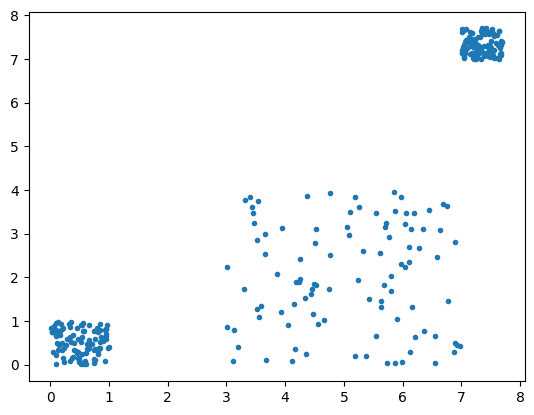

In [16]:
plt.scatter(data[:,0],data[:,1], marker='.')

Typically, we need to noramlize all dimensions in order to get reasonable k-means resuls. This is especially true if two axes are in different units or different scales. Therefore, we can use the `whiten` function. This, eseentially, divides each dimension by its variance.

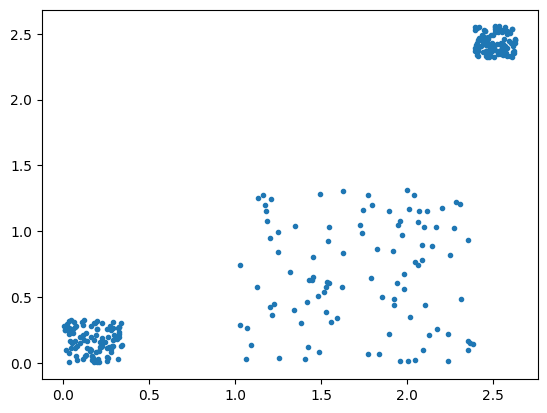

In [20]:
data = vq.whiten(data)
plt.scatter(data[:,0],data[:,1], marker='.') 

# Running k-means
The actual k-means algorithm can be run from scipy as follows (for three clusters).

In [30]:
centroids, mean_value = vq.kmeans(data, 3)

print("Code book :\n", centroids, "\n")
print("Mean of Euclidean distances :", 
      mean_value.round(4))

Code book :
 [[1.73919385 0.67861549]
 [0.17888773 0.16977912]
 [2.50595902 2.43289488]] 

Mean of Euclidean distances : 0.2493


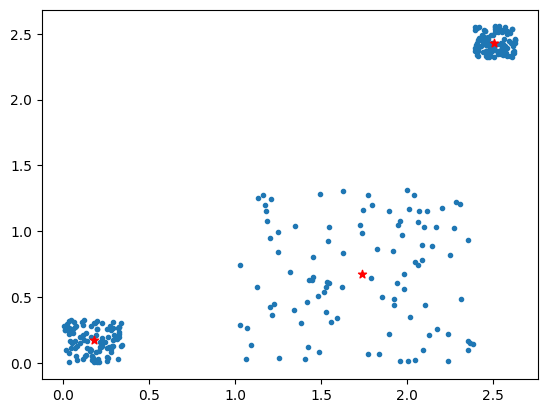

In [29]:
plt.scatter(data[:,0],data[:,1], marker='.') 
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='red')

# K-means with too many clusters

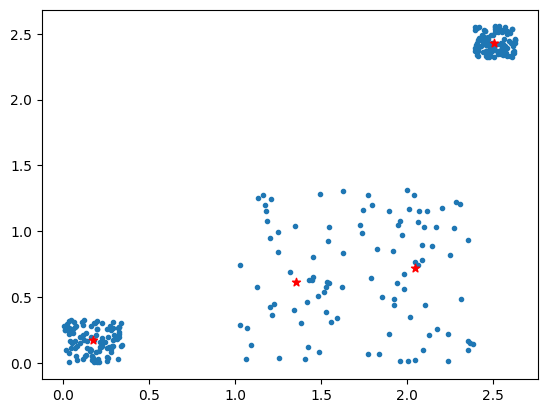

In [32]:
centroids, mean_value = vq.kmeans(data, 4)
plt.scatter(data[:,0],data[:,1], marker='.') 
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='red')

# k-means with too few clusters

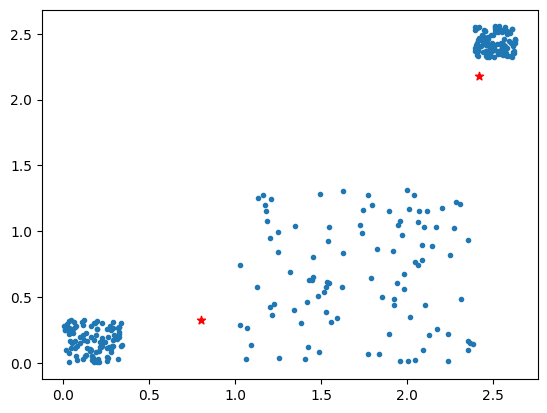

In [34]:
centroids, mean_value = vq.kmeans(data, 2)
plt.scatter(data[:,0],data[:,1], marker='.') 
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='red')

# Choosing number of clusters 
Choosing the right number of clusters is often difficult, various more or less heuristic methods are around. What is definitely useful is too look at the error how it reduces with the number of clusters. For example the ellbow criterion (though you should not neededly use it)

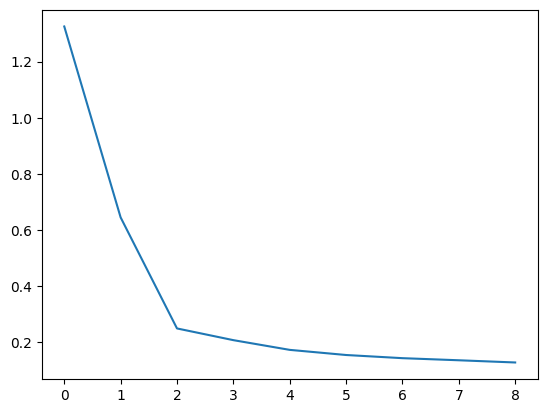

In [38]:
evolution = [vq.kmeans(data,i)[1] for i in range(1,10)]
plt.plot(evolution)

A larger clustering example

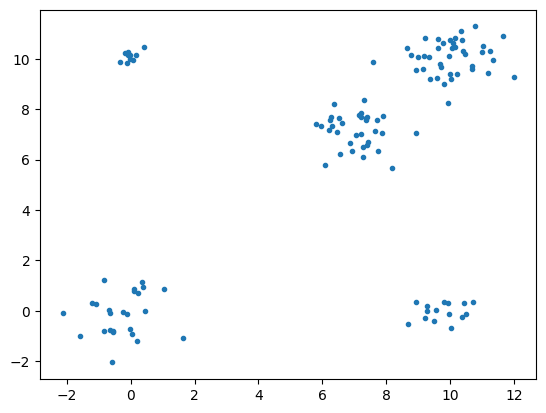

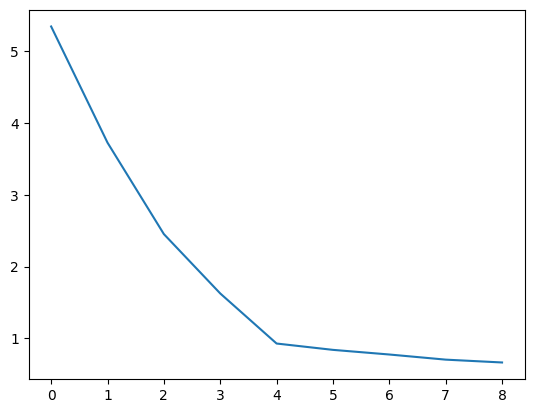

In [45]:
# x y sigma N
cluster=[[0,0,1,50],[10,0,0.5,30],[0,10,0.2,20],[10,10,0.8,80],[7,7,0.9,70]]
plt.scatter(data[:,0],data[:,1], marker='.') 
plt.show()
data = np.vstack([np.random.normal(scale=s,size=N).reshape(-1,2)+[x,y] for x,y,s,N in cluster])
evolution = [vq.kmeans(data,i)[1] for i in range(1,10)]
plt.plot(evolution)